In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
root_path = 'gdrive/My Drive'

Mounted at /content/gdrive


In [ ]:
import sys
import json
import io
import numpy as np
import sklearn
import pandas as pd
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_data = pd.read_json(root_path+'/train.json')
test_data = pd.read_json(root_path+'/test.json')

In [ ]:
train_data.describe()
# train_data.nunique()

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


In [ ]:
# train_data['ingredients'].unique()
train_data.isnull().sum()

id             0
cuisine        0
ingredients    0
dtype: int64

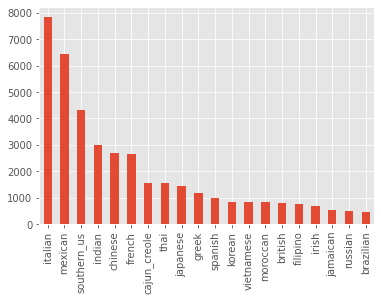

In [ ]:
plt.style.use('ggplot')
train_data['cuisine'].value_counts().plot(kind='bar')

In [ ]:
cv = CountVectorizer()
train_data['concat_ingredients'] = train_data['ingredients'].map(';'.join)
test_data['concat_ingredients'] = test_data['ingredients'].map(';'.join)
train_data.head()

,id,cuisine,ingredients,concat_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",romaine lettuce;black olives;grape tomatoes;ga...
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",plain flour;ground pepper;salt;tomatoes;ground...
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",eggs;pepper;salt;mayonaise;cooking oil;green c...
3,22213,indian,"[water, vegetable oil, wheat, salt]",water;vegetable oil;wheat;salt
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",black pepper;shallots;cornflour;cayenne pepper...


In [ ]:
## This Function helpfull for lower casing and stripping accents also
X = cv.fit_transform(train_data['concat_ingredients'].values)
X_test = cv.transform(test_data['concat_ingredients'].values)

In [ ]:
id_test = test_data['id']
Y = train_data['cuisine']
Y.head()

0          greek
1    southern_us
2       filipino
3         indian
4         indian
Name: cuisine, dtype: object

In [ ]:
## Naive Bayes Classifier
NaiveModel = MultinomialNB().fit(X,Y)

In [ ]:
## Random Forest CLassifier
Model1 = RandomForestClassifier(max_depth=40, n_estimators=20).fit(X,Y)

In [ ]:
## Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
Model2 =DecisionTreeClassifier(max_depth=40).fit(X,Y)

In [ ]:
print("predicting")
Naive_PredictedY1s = NaiveModel.predict(X)
Random_PredictedY1s = Model1.predict(X)
DT_PredictedY1s = Model2.predict(X)

predicting


In [ ]:
NB=np.mean ( Naive_PredictedY1s == Y)
RF=np.mean ( Random_PredictedY1s == Y)
DT=np.mean ( DT_PredictedY1s == Y)
print("Naive Bayes Accurracy : %f " % np.mean ( Naive_PredictedY1s == Y))
print("Random Forest Accurracy : %f " % np.mean ( Random_PredictedY1s == Y))
print("Decision Tree Accurracy : %f " % np.mean ( DT_PredictedY1s == Y))

Naive Bayes Accurracy : 0.744557 
Random Forest Accurracy : 0.916026 
Decision Tree Accurracy : 0.846533 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


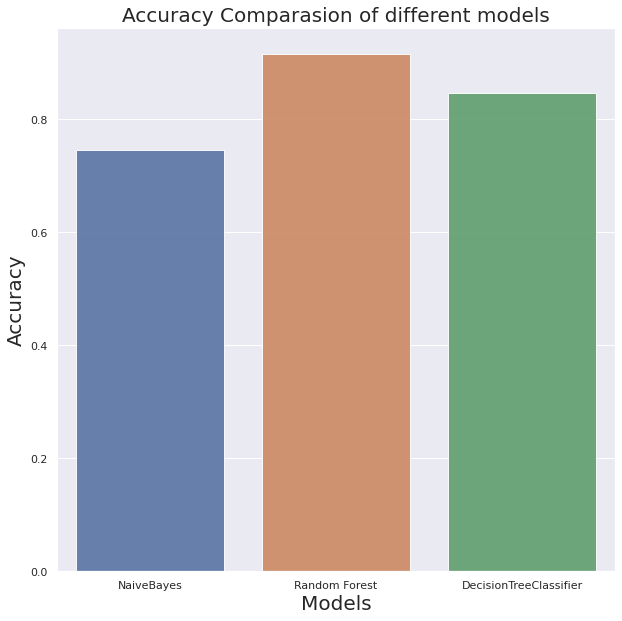

In [ ]:
names = ['NaiveBayes','Random Forest','DecisionTreeClassifier']
acc_scores = [NB,RF,DT]
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))
sns.barplot(names, acc_scores,alpha=0.9)
plt.title('Accuracy Comparasion of different models',fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xlabel('Models', fontsize=20)
plt.show()

In [ ]:
print(classification_report(Naive_PredictedY1s, Y))

              precision    recall  f1-score   support

   brazilian       0.44      0.60      0.51       347
     british       0.49      0.36      0.42      1080
cajun_creole       0.76      0.59      0.66      1996
     chinese       0.87      0.76      0.81      3077
    filipino       0.52      0.74      0.61       529
      french       0.57      0.55      0.56      2758
       greek       0.70      0.69      0.69      1197
      indian       0.88      0.85      0.87      3098
       irish       0.46      0.65      0.54       465
     italian       0.78      0.85      0.81      7226
    jamaican       0.65      0.83      0.73       414
    japanese       0.63      0.89      0.74      1009
      korean       0.75      0.82      0.78       756
     mexican       0.88      0.92      0.90      6170
    moroccan       0.79      0.73      0.76       888
     russian       0.42      0.60      0.49       345
 southern_us       0.72      0.62      0.67      5060
     spanish       0.55    

In [ ]:
print(classification_report(Random_PredictedY1s, Y))

              precision    recall  f1-score   support

   brazilian       0.79      0.99      0.88       371
     british       0.66      1.00      0.79       530
cajun_creole       0.92      1.00      0.96      1429
     chinese       0.96      0.96      0.96      2670
    filipino       0.78      1.00      0.88       593
      french       0.80      0.92      0.85      2307
       greek       0.84      0.99      0.91       992
      indian       0.96      0.98      0.97      2932
       irish       0.70      0.97      0.81       482
     italian       0.98      0.82      0.90      9322
    jamaican       0.85      1.00      0.92       445
    japanese       0.90      0.98      0.94      1308
      korean       0.91      0.99      0.95       761
     mexican       0.97      0.97      0.97      6456
    moroccan       0.88      1.00      0.93       721
     russian       0.65      1.00      0.79       319
 southern_us       0.96      0.79      0.87      5203
     spanish       0.70    

In [ ]:
print(classification_report(DT_PredictedY1s, Y))

              precision    recall  f1-score   support

   brazilian       0.66      0.97      0.79       320
     british       0.49      0.72      0.58       545
cajun_creole       0.83      0.98      0.90      1306
     chinese       0.92      0.92      0.92      2669
    filipino       0.66      0.98      0.79       505
      french       0.68      0.69      0.69      2622
       greek       0.82      0.99      0.90       976
      indian       0.94      0.99      0.96      2823
       irish       0.53      0.97      0.69       366
     italian       0.88      0.88      0.88      7813
    jamaican       0.75      0.98      0.85       402
    japanese       0.83      0.99      0.91      1194
      korean       0.88      1.00      0.94       729
     mexican       0.92      0.98      0.95      6074
    moroccan       0.85      1.00      0.92       698
     russian       0.42      0.98      0.59       211
 southern_us       0.92      0.52      0.66      7671
     spanish       0.65    

In [ ]:
## Predicting the test data
Predicted_Cuisines = Model1.predict(X_test)

In [ ]:
## Output Predictions
out = io.open('submit.csv','w')
out.write(u'id , cuisine\n')
for i in range(9944):
    out.write('%s,%s\n' % (id_test[i], Predicted_Cuisines[i]))

In [ ]:
## This section is to predict the user input ingredients

ing_array = ["baking powder;eggs;all-purpose flour;raisins;milk;white sugar"]
no_of_ingredients = input("Total Number Of Ingredients: ")
no_of_ingredients = int(no_of_ingredients)

ingredient = ""

for i in range(no_of_ingredients):
    ing = input("Enter Ingredient " + str(i) + " : ")
    ingredient = ingredient + ing + ";"

## Predicting User input ingredients

ing_array.append(ingredient)
User_in = cv.transform(ing_array)
Predicted = Model1.predict(User_in)
print("")
print("The predicted cuisine for input ingredients is : "+Predicted[1])

Total Number Of Ingredients: 2
Enter Ingredient 0 : egg
Enter Ingredient 1 : milk

The predicted cuisine for input ingredients is : italian


In [ ]:
corelation=train_data.corr()

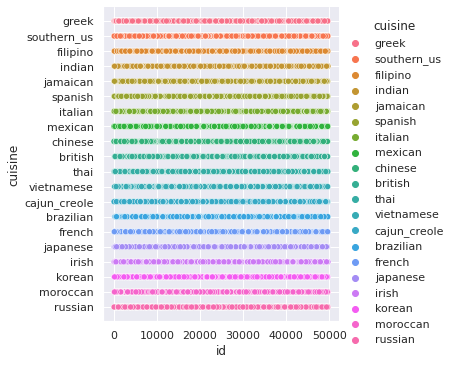

In [ ]:
sns.relplot(x='id',y='cuisine',hue='cuisine',data=train_data)

[list(['romaine lettuce', 'black olives', 'grape tomatoes', 'garlic', 'pepper', 'purple onion', 'seasoning', 'garbanzo beans', 'feta cheese crumbles'])
 list(['plain flour', 'ground pepper', 'salt', 'tomatoes', 'ground black pepper', 'thyme', 'eggs', 'green tomatoes', 'yellow corn meal', 'milk', 'vegetable oil'])
 list(['eggs', 'pepper', 'salt', 'mayonaise', 'cooking oil', 'green chilies', 'grilled chicken breasts', 'garlic powder', 'yellow onion', 'soy sauce', 'butter', 'chicken livers'])
 ...
 list(['eggs', 'citrus fruit', 'raisins', 'sourdough starter', 'flour', 'hot tea', 'sugar', 'ground nutmeg', 'salt', 'ground cinnamon', 'milk', 'butter'])
 list(['boneless chicken skinless thigh', 'minced garlic', 'steamed white rice', 'baking powder', 'corn starch', 'dark soy sauce', 'kosher salt', 'peanuts', 'flour', 'scallions', 'Chinese rice vinegar', 'vodka', 'fresh ginger', 'egg whites', 'broccoli', 'toasted sesame seeds', 'sugar', 'store bought low sodium chicken stock', 'baking soda', 'S

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


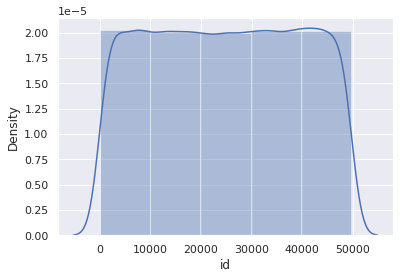

In [ ]:
data=np.array(train_data['ingredients'])
print(data)
sns.distplot(train_data['id'],bins=5)